In [1]:
# Import dependencies.
import pandas as pd
import matplotlib as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# import the time library and the datetime module from teh datetime library.
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
longs = np.random.uniform(-180, 180, size = 1500)
lats_longs = zip(lats, longs)
lats_longs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_longs)

In [4]:
# Use the citipy mmodule to determine the city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Create an empty list to hold the weather data.
city_data=[]

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, set numbers, and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | muli
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | aksu
Processing Record 6 of Set 1 | kailua
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | nalut
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | kosh-agach
Processing Record 11 of Set 1 | tranas
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | urumqi
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | miyako
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | araouane
Processing Record 23 of Se

Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | valjala
City not found. Skipping...
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | neiafu
Processing Record 44 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 4 | lavumisa
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | teguldet
Processing Record 49 of Set 4 | pisco
Processing Record 50 of Set 4 | hami
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | zavitinsk
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 5 of Set 5 | aketi
Processing Record 6 of Set 5 | bluff
Processing Record 7 of Set 5 | roald
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | yumen
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | yichang
Processing Recor

Processing Record 29 of Set 8 | barbar
City not found. Skipping...
Processing Record 30 of Set 8 | menongue
Processing Record 31 of Set 8 | zatoka
Processing Record 32 of Set 8 | lubao
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | ballina
Processing Record 35 of Set 8 | abakan
Processing Record 36 of Set 8 | youghal
Processing Record 37 of Set 8 | sungairaya
Processing Record 38 of Set 8 | venice
Processing Record 39 of Set 8 | chumikan
Processing Record 40 of Set 8 | inirida
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | pak phanang
Processing Record 43 of Set 8 | seara
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | pravia
Processing Record 46 of Set 8 | abatskoye
Processing Record 47 of Set 8 | igarka
Processing Record 48 of Set 8 | kyra
Processing Record 49 of Set 8 | jiangyou
Processing Record 50 of Set 8 | ottawa
Processing Record 1 of Set 9 | dunedin
Processing Record 2 of Set 9

Processing Record 15 of Set 12 | khartoum
Processing Record 16 of Set 12 | sistranda
Processing Record 17 of Set 12 | valparaiso
Processing Record 18 of Set 12 | naila
Processing Record 19 of Set 12 | tefe
Processing Record 20 of Set 12 | saint-gaudens
Processing Record 21 of Set 12 | shelburne
Processing Record 22 of Set 12 | luena
Processing Record 23 of Set 12 | bagojo
Processing Record 24 of Set 12 | agadir
Processing Record 25 of Set 12 | rudbar
Processing Record 26 of Set 12 | riacho de santana
Processing Record 27 of Set 12 | rodeo
Processing Record 28 of Set 12 | kholm
Processing Record 29 of Set 12 | port lincoln
Processing Record 30 of Set 12 | hidrolandia
Processing Record 31 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 32 of Set 12 | renukut
Processing Record 33 of Set 12 | lunenburg
Processing Record 34 of Set 12 | atambua
Processing Record 35 of Set 12 | muravlenko
Processing Record 36 of Set 12 | tiarei
Processing Record 37 of Set 12 | vardo
Process

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muli,2.9167,73.5667,80.78,65,82,11.68,MV,2022-01-29 01:08:46
1,Busselton,-33.6500,115.3333,82.04,44,100,7.74,AU,2022-01-29 01:08:47
2,Rikitea,-23.1203,-134.9692,78.30,69,97,13.96,PF,2022-01-29 01:08:47
3,Aksu,41.1231,80.2644,20.32,56,69,1.83,CN,2022-01-29 01:08:49
4,Kailua,21.4022,-157.7394,81.81,63,20,5.75,US,2022-01-29 01:08:49
5,Castro,-24.7911,-50.0119,59.18,98,100,9.95,BR,2022-01-29 01:08:07
6,Nalut,30.3333,10.8500,42.48,36,4,5.91,LY,2022-01-29 01:08:51
7,Longyearbyen,78.2186,15.6401,6.64,85,0,17.27,SJ,2022-01-29 01:07:38
8,Kosh-Agach,50.0000,88.6667,-29.40,100,100,3.31,RU,2022-01-29 01:08:52
9,Tranas,58.0372,14.9782,34.83,91,100,12.62,SE,2022-01-29 01:08:53


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muli,MV,2022-01-29 01:08:46,2.9167,73.5667,80.78,65,82,11.68
1,Busselton,AU,2022-01-29 01:08:47,-33.6500,115.3333,82.04,44,100,7.74
2,Rikitea,PF,2022-01-29 01:08:47,-23.1203,-134.9692,78.30,69,97,13.96
3,Aksu,CN,2022-01-29 01:08:49,41.1231,80.2644,20.32,56,69,1.83
4,Kailua,US,2022-01-29 01:08:49,21.4022,-157.7394,81.81,63,20,5.75
5,Castro,BR,2022-01-29 01:08:07,-24.7911,-50.0119,59.18,98,100,9.95
6,Nalut,LY,2022-01-29 01:08:51,30.3333,10.8500,42.48,36,4,5.91
7,Longyearbyen,SJ,2022-01-29 01:07:38,78.2186,15.6401,6.64,85,0,17.27
8,Kosh-Agach,RU,2022-01-29 01:08:52,50.0000,88.6667,-29.40,100,100,3.31
9,Tranas,SE,2022-01-29 01:08:53,58.0372,14.9782,34.83,91,100,12.62


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity  = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

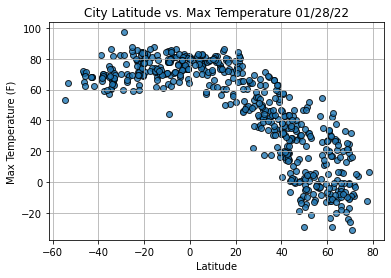

In [23]:
# Import the time module.
import time

import matplotlib.pyplot as plt

# Build the scatter plot for latitidue vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

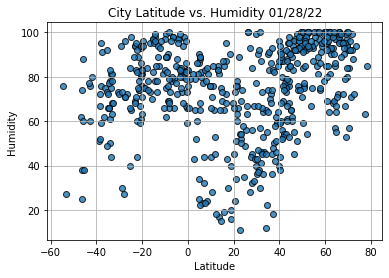

In [24]:
# Build the scatter plot for latitidue vs. humidity.
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

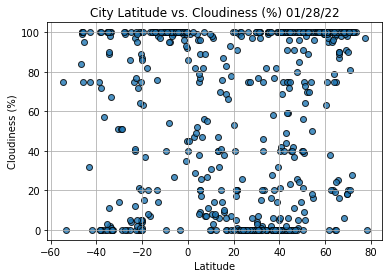

In [25]:
# Build the scatter plot for latitidue vs. cloudiness.
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

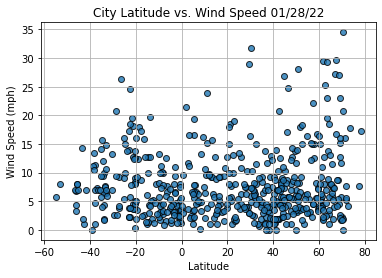

In [26]:
# Build the scatter plot for latitidue vs. wind speed.
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()